In [ ]:
%env ROOTPATH=/content/drive/MyDrive/

Download dataset

In [ ]:
!wget https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip $rootPath

Install

In [ ]:
!unzip ${ROOTPATH}/FullIJCNN2013.zip
!mkdir ${ROOTPATH}/dataset/train ${ROOTPATH}/dataset/test
!mv ${ROOTPATH}/dataset/00 ${ROOTPATH}/dataset/train/0
!mv ${ROOTPATH}/dataset/0* ${ROOTPATH}/dataset/test/
!mv ${ROOTPATH}/dataset/0* ${ROOTPATH}/dataset/1* ${ROOTPATH}/dataset/2* ${ROOTPATH}/dataset/3* ${ROOTPATH}/dataset/4* ${ROOTPATH}/dataset/train

Import Libraries

In [122]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Variable

In [86]:
rootDir = Path("/content/drive/MyDrive/Traffic-Sign/")
dataDir = rootDir/"dataset/"
trainDir = dataDir/"train/"
testDir = dataDir/"test/"

testRatio = 0.2
validationRatio = 0.2

In [64]:
numberOfClasses = len(os.listdir(trainDir))
print("Class number: {}".format(numberOfClasses))

Class number: 43


Load Training Data

In [96]:
images = []
classes = []

for folder in trainDir.glob("*"):
  trainImage = (trainDir/folder.name).glob("*.ppm")
  for img in trainImage:
    images.append(trainDir/folder.name/img)
    classes.append(int(folder.name))

images = np.array(images)
classes = np.array(classes)

Spliting Data

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(images, classes, test_size=testRatio)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=validationRatio)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_validation = np.array(X_validation)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_validation = np.array(Y_validation)

Number of the Samples

In [112]:
numberOfSamples = []
for i in range(0, numberOfClasses):
  numberOfSamples.append(len(np.where(Y_train==i)[0]))
print(numberOfSamples)

[3, 48, 48, 14, 49, 32, 13, 25, 34, 29, 50, 28, 42, 53, 25, 8, 4, 20, 22, 2, 6, 4, 9, 12, 2, 22, 15, 3, 9, 4, 8, 2, 8, 12, 9, 16, 7, 1, 56, 4, 6, 3, 9]


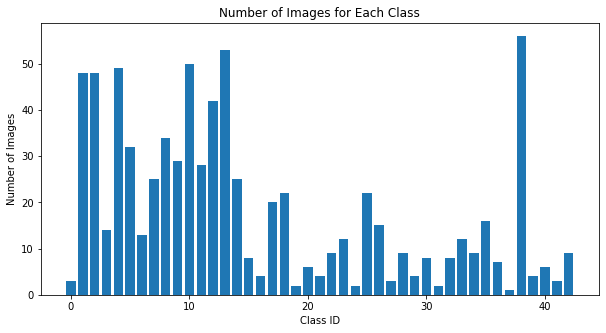

In [113]:
plt.figure(figsize=(10, 5))
plt.bar(range(0, numberOfClasses), numberOfSamples)
plt.title("Number of Images for Each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

Preproccessing

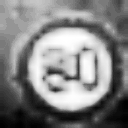

In [152]:
def preProccessing(img):
  img = cv2.imread(str(img))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  # img = img/255.
  return img

img = preProccessing(X_train[30])
cv2_imshow(img)

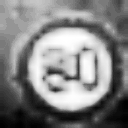

In [153]:
X_train = np.array(list(map(preProccessing, X_train)))
img = X_train[30]
cv2.resize(img, (300,300))
cv2_imshow(img)